# **Gradient Descent for Diabetes Prediction**

## **Introduction to Gradient Descent**

Gradient descent is a foundational optimization method in machine learning, designed to minimize the cost function of a model. By iteratively adjusting the model's parameters in the direction that reduces the cost function, gradient descent facilitates the identification of the optimal parameters for a given model. This method is particularly valuable for models where traditional optimization techniques may be computationally intensive, such as with large datasets or complex models like neural networks.

## **Algorithm**

Gradient descent is an iterative optimization strategy that's key for fitting models in machine learning, especially when the dataset in question is substantial, and classical approaches such as ordinary least squares are not viable due to their computational intensity. Here's a refined explanation of this approach:

1. **Initialization:** The journey of gradient descent starts by assigning initial guesses to the model's parameters, often referred to as weights. These initial values can be set to zero, random numbers, or results from a previous run, serving as the inception point for the optimization trek.
2. **Cost Function:** The cost function, commonly the Mean Squared Error (MSE) for regression tasks, measures the discrepancy between the model's predictions and the actual values. The central objective of gradient descent is the minimization of this cost function, guiding the adjustments to the model parameters.
3. **Gradient Calculation:** At each step, the algorithm computes the gradient of the cost function concerning the parameters. The gradient vector indicates the direction of the steepest increase in cost, and thus, the model parameters are updated in the opposite direction to reduce the cost.
4. **Parameter Update:** This step involves the recalibration of the weights by subtracting a fraction of the gradient from them. This fraction is determined by the learning rate, a small positive value that controls the size of the update steps. The ideal learning rate is crucial since it influences the pace and reliability of the convergence.
5. **Iteration:** The process repeats in a loop—calculating the gradient and updating the parameters—continuously honing the weights to decrease the cost function, steadily progressing toward the minimum.
6. **Convergence:** The process is considered to have converged when the changes in the cost function become negligible or when it reaches a pre-specified number of iterations.
7. **Stochastic and Mini-batch Variants:** To optimize computation, Stochastic Gradient Descent (SGD) updates parameters using a single data point at a time, while mini-batch gradient descent uses a subset of the data, striking a balance between computational load and convergence stability.

## **Advantages and Disadvantages**

**Advantages of Gradient Descent:**

1. **Scalability:**  It is particularly efficient for large datasets, where full-batch methods are computationally untenable.
2. **Versatility:** Gradient descent's application is not limited to linear regression; it's also used for logistic regression, neural networks, and a variety of other machine learning models that require cost optimization.
3. **Ease of Implementation:** Its conceptual simplicity makes it accessible, and its implementation is straightforward.
4. **Non-linear Modeling:** It can be applied to optimize non-linear models, offering a significant edge over optimization methods constrained to linear functions.

**Challenges with Gradient Descent:**

1. **Learning Rate Sensitivity:** The performance of gradient descent is heavily reliant on the choice of learning rate. An inappropriate rate can lead to either slow convergence or overshooting the minimum.
2. **Local Minima Risks:** In complex, non-convex optimization landscapes, there's a chance of the algorithm getting stuck in local minima.
3. **Necessity of Feature Scaling:** To ensure efficient convergence, gradient descent requires that the features be on a similar scale.
4. **Initial Conditions:** The starting values can significantly influence the convergence, affecting the global or local minimum that the algorithm arrives at.
5. **Plateau Difficulty:** Near plateaus or saddle points, where gradients are minimal, the algorithm's progress can significantly slow, delaying the attainment of the minimum.
6. **Hyperparameter Selection:** Determining the optimal set of hyperparameters, such as momentum in SGD, demands experimentation and a deep understanding of the algorithm's dynamics.

In sum, while gradient descent is a powerful tool in machine learning for parameter optimization, its effectiveness depends on the proper tuning of its hyperparameters and understanding of the model's and the data's characteristics.

## **Applying Gradient Descent to Diabetes Dataset**

The diabetes dataset comprises various diagnostic measurements used to predict the onset of diabetes. We aim to apply gradient descent to optimize a predictive model based on these measurements.

### Initial Data Exploration

First, we load and inspect the diabetes dataset:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Preprocessing

Selecting features and the target, followed by feature scaling:

In [4]:
# Selecting features and target variable
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Feature scaling for optimal gradient descent performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Gradient Descent Implementation

Using SGDClassifier to apply gradient descent, with a focus on optimizing the model's coefficients to minimize the prediction error:

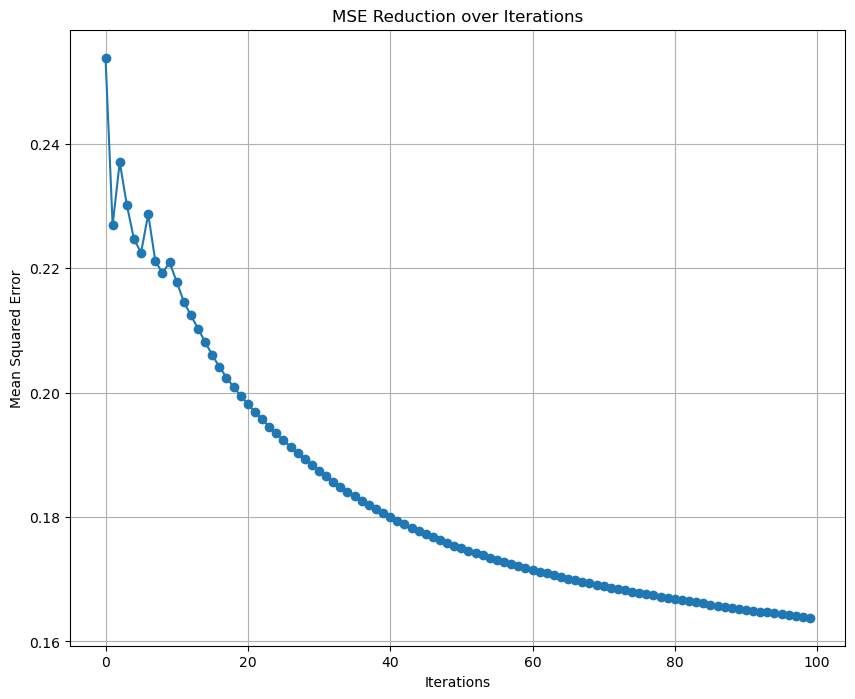

Test MSE: 0.19922606048132377


In [5]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset
df = pd.read_csv('diabetes.csv')

# Step 3: Preprocess the dataset
# Selecting features and the target variable
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Feature scaling for optimal gradient descent performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Gradient Descent with SGDClassifier
# Initialize the SGDClassifier with the corrected 'loss' parameter
sgd_classifier = SGDClassifier(max_iter=1, tol=None, warm_start=True, eta0=0.01, random_state=42, loss="log_loss")

# List for storing the mean squared errors
mse_list = []

# Iteratively update the model and calculate MSE
for _ in range(100):
    sgd_classifier.partial_fit(X_train, y_train, classes=np.unique(y))
    y_pred = sgd_classifier.predict_proba(X_train)[:,1]  # Using predict_proba for probability estimates
    mse = mean_squared_error(y_train, y_pred)
    mse_list.append(mse)

# Visualizing the MSE over iterations
plt.figure(figsize=(10, 8))
plt.plot(mse_list, marker='o')
plt.title('MSE Reduction over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Optional: Evaluating the model's performance on the test set
# This section is not necessary for the MSE plot but is useful for understanding model performance
y_pred_test = sgd_classifier.predict_proba(X_test)[:,1]
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE: {mse_test}")


### Analyzing MSE Trends

From the MSE plot, we can observe a rapid decline in the error rate during the initial iterations, which is indicative of significant learning and model improvement. As we continue to iterate, the descent in MSE begins to taper off, suggesting that the model is nearing the optimal solution within the limits of its complexity and the provided data. This is a common behavior in gradient descent optimization, where initial gains are often substantial, followed by incremental improvements as the model converges to a minimum.

### Evaluating Model Predictions

The predictions made by the model on the test set allow us to assess its performance on unseen data. By plotting the actual outcomes against the predicted probabilities, we gain visual insight into how well the model's predictions align with the true labels:

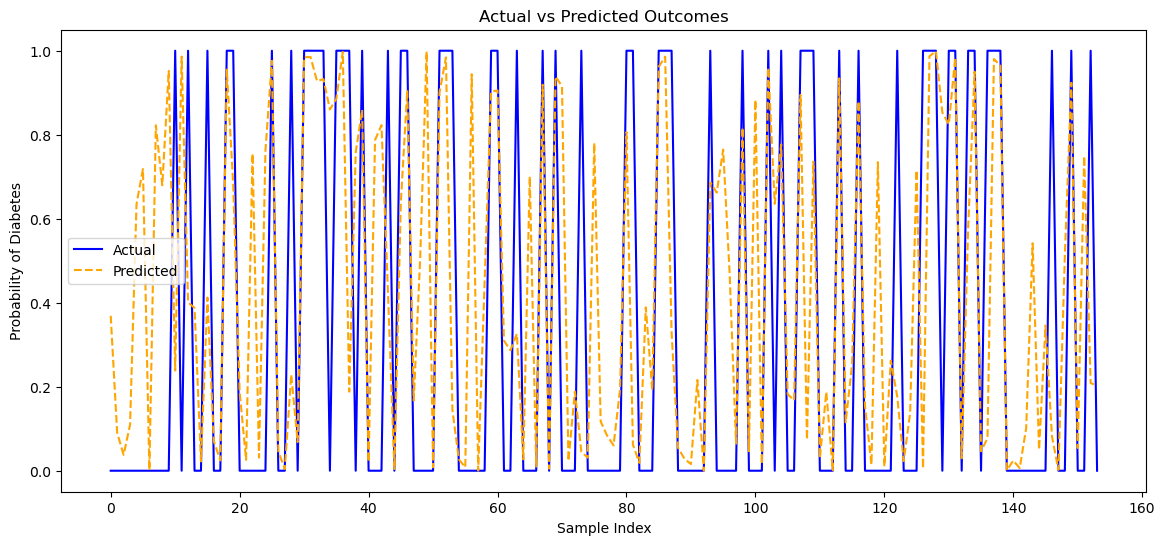

In [6]:
# Generating predictions for the test set
y_pred_test = sgd_classifier.predict_proba(X_test)[:,1]

plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', linestyle='-', color='blue')
plt.plot(np.arange(len(y_test)), y_pred_test, label='Predicted', linestyle='--', color='orange')
plt.title('Actual vs Predicted Outcomes')
plt.xlabel('Sample Index')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.show()


### Conclusion and Model Insights

The comparison between actual and predicted outcomes can reveal the model's predictive capabilities. The plot might show that the model captures the trend of the data but with noticeable gaps between the predicted probabilities and the actual labels. These deviations highlight potential areas for model refinement.

The test MSE of 0.199 indicates that, on average, the square of the error between the predicted probabilities and the actual outcomes is under 0.2. While not perfect, it provides a benchmark for model performance. To enhance the model's predictive accuracy, we might consider:

1. **Feature Engineering:** Investigating new features or transforming existing ones could uncover more significant relationships within the data.
2. **Model Complexity:** Adjusting the complexity of the model, perhaps by incorporating interaction terms or polynomial features, may capture more nuanced patterns.
3. **Hyperparameter Optimization:** Fine-tuning the learning rate, the regularization strength, or other hyperparameters could lead to better convergence properties.
4. **Advanced Models:** Exploring more sophisticated models or ensembles that might be better suited to the complexity of the dataset.

In summary, gradient descent has successfully optimized our model's parameters for the task at hand. Yet, the journey to improve model performance is iterative and requires ongoing analysis and adjustments based on insights gained from model evaluations, such as the one we've just conducted.